### Import libraries

In [1]:
import os
import time
import cv2 as cv
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

### Keypoint by mediapipe holistic

In [2]:
#Holistic model
mp_holistic = mp.solutions.holistic 

#Drawing utilities
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)  #converting color from BGR to RGB
  image.flags.writeable = False #cannot write on image
  result = model.process(image) #make prediction
  image.flags.writeable =True #now image is writeable
  image = cv.cvtColor(image, cv.COLOR_RGB2BGR) #converting color from RGb to BGR
  
  return image, result

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, result):
  #draw face connections
  mp_drawing.draw_landmarks(image, result.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,111), thickness=1, circle_radius=1)
                            )
  
  #draw pose connecctions
  mp_drawing.draw_landmarks(image, result.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            )

  #draw left hand connections
  mp_drawing.draw_landmarks(image, result.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
  
  #draw right hand connections
  mp_drawing.draw_landmarks(image, result.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )

In [6]:
cap = cv.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():

      #read feed
      ret, frame = cap.read()
      # frame = cv.flip(frame, 1)

      #make detections
      image, result = mediapipe_detection(frame, holistic)
      print(result)

      #draw landmarks
      draw_styled_landmarks(image, result)
      # draw_landmarks(image, result)

      #display 
      cv.imshow('Sign Recognition', image)

      #break gracefully
      if cv.waitKey(1) & 0xFF == ord('q'):
        break

  cap.release()
  cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
result

mediapipe.python.solution_base.SolutionOutputs

In [8]:
result.face_landmarks

landmark {
  x: 0.44672292470932007
  y: 0.3449627757072449
  z: -0.024125361815094948
}
landmark {
  x: 0.44264450669288635
  y: 0.30952170491218567
  z: -0.04166579619050026
}
landmark {
  x: 0.4456024765968323
  y: 0.3210223913192749
  z: -0.022785808891057968
}
landmark {
  x: 0.43642354011535645
  y: 0.27478083968162537
  z: -0.028332307934761047
}
landmark {
  x: 0.44197338819503784
  y: 0.2984013557434082
  z: -0.04387640208005905
}
landmark {
  x: 0.44217997789382935
  y: 0.2841271758079529
  z: -0.040140483528375626
}
landmark {
  x: 0.4438554644584656
  y: 0.25015103816986084
  z: -0.01732475310564041
}
landmark {
  x: 0.39299216866493225
  y: 0.25534316897392273
  z: 0.02295677550137043
}
landmark {
  x: 0.4435916841030121
  y: 0.22420039772987366
  z: -0.010496297851204872
}
landmark {
  x: 0.4428817331790924
  y: 0.2095068395137787
  z: -0.011144266463816166
}
landmark {
  x: 0.44283050298690796
  y: 0.15852054953575134
  z: 0.0004401135665830225
}
landmark {
  x: 0.447030

In [9]:
len(result.face_landmarks.landmark)

468

In [10]:
frame

array([[[153, 183, 225],
        [154, 186, 226],
        [158, 188, 224],
        ...,
        [161, 153, 146],
        [163, 150, 148],
        [164, 147, 150]],

       [[152, 181, 223],
        [158, 187, 228],
        [158, 188, 224],
        ...,
        [160, 155, 147],
        [163, 153, 149],
        [164, 150, 151]],

       [[159, 186, 228],
        [157, 185, 226],
        [153, 180, 217],
        ...,
        [159, 158, 150],
        [161, 157, 151],
        [162, 156, 151]],

       ...,

       [[ 42,  41,  44],
        [ 45,  44,  47],
        [ 40,  40,  43],
        ...,
        [ 11,  27,  17],
        [ 11,  27,  17],
        [  9,  26,  16]],

       [[ 48,  50,  49],
        [ 49,  50,  50],
        [ 48,  49,  49],
        ...,
        [ 13,  26,  19],
        [ 15,  28,  21],
        [ 11,  25,  18]],

       [[ 58,  62,  58],
        [ 57,  60,  57],
        [ 63,  63,  62],
        ...,
        [ 16,  26,  21],
        [ 16,  27,  22],
        [ 12,  23,  18]]

In [11]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [12]:
draw_landmarks(frame, result)

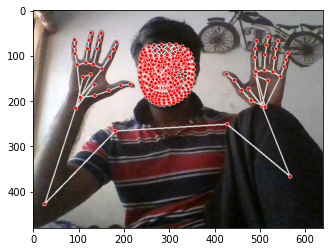

In [13]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))

In [14]:
result.right_hand_landmarks.landmark

[x: 0.1638878881931305
y: 0.4009748101234436
z: 3.527176772877283e-07
, x: 0.2131347954273224
y: 0.3927364945411682
z: -0.02341144159436226
, x: 0.2612968683242798
y: 0.3692083954811096
z: -0.035145457834005356
, x: 0.3020126521587372
y: 0.3471660614013672
z: -0.04546103999018669
, x: 0.3351532518863678
y: 0.3411189317703247
z: -0.05583903566002846
, x: 0.23762404918670654
y: 0.2696833908557892
z: -0.018915986642241478
, x: 0.26461389660835266
y: 0.2160211205482483
z: -0.03211717680096626
, x: 0.2778601348400116
y: 0.1798182725906372
z: -0.04351329058408737
, x: 0.2879657745361328
y: 0.14893992245197296
z: -0.05198410525918007
, x: 0.20932698249816895
y: 0.24882963299751282
z: -0.01781090907752514
, x: 0.22185476124286652
y: 0.1787320375442505
z: -0.0285438671708107
, x: 0.22919106483459473
y: 0.13795188069343567
z: -0.038202282041311264
, x: 0.23463161289691925
y: 0.10639519989490509
z: -0.04561683535575867
, x: 0.181318998336792
y: 0.24319642782211304
z: -0.01949286460876465
, x: 0.1

In [15]:
len(result.pose_landmarks.landmark)

33

### Extract Keypoint values

In [16]:
pose = []
for res in result.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [17]:
pose

[array([ 0.43345603,  0.30823264, -0.51614773,  0.99993169]),
 array([ 0.46727833,  0.24839205, -0.47960514,  0.99982411]),
 array([ 0.48593822,  0.24932416, -0.47927928,  0.99983078]),
 array([ 0.50272644,  0.25205323, -0.47896355,  0.99981064]),
 array([ 0.41484267,  0.25014058, -0.44658384,  0.99983835]),
 array([ 0.39979208,  0.2517114 , -0.44618315,  0.99984306]),
 array([ 0.38715228,  0.25435624, -0.44667417,  0.99986356]),
 array([ 0.52643222,  0.2722559 , -0.25744301,  0.99979228]),
 array([ 0.38336509,  0.27479213, -0.09428434,  0.99989474]),
 array([ 0.47040063,  0.37108308, -0.43610653,  0.99970371]),
 array([ 0.40823779,  0.36914098, -0.39288381,  0.99984723]),
 array([ 0.66970932,  0.52398425, -0.09921752,  0.99860442]),
 array([0.28352264, 0.55526888, 0.05112907, 0.99919438]),
 array([ 0.88746595,  0.76307386, -0.49354133,  0.92716807]),
 array([ 0.04044271,  0.89005435, -0.43007755,  0.97271663]),
 array([ 0.78920019,  0.44091362, -0.90646803,  0.98364663]),
 array([ 0.1

In [6]:
def extract_keypoints(result):
    face = np.array([[res.x, res.y, res.z] for res in result.face_landmarks.landmark]).flatten() if result.face_landmarks else np.zeros(468*3)
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in result.pose_landmarks.landmark]).flatten() if result.pose_landmarks else np.zeros(33*4) 
    lh = np.array([[res.x, res.y, res.z] for res in result.left_hand_landmarks.landmark]).flatten() if result.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in result.right_hand_landmarks.landmark]).flatten() if result.right_hand_landmarks else np.zeros(21*3) 

    return np.concatenate([face, pose, lh, rh])

In [19]:
result_test = extract_keypoints(result)

In [20]:
result_test

array([ 0.44672292,  0.34496278, -0.02412536, ...,  0.14370774,
        0.1372866 , -0.04120889])

In [21]:
np.save('0', result_test)

In [ ]:
np.load('0.npy')

### Setup folder for collection

In [7]:
# Path for extracted data in numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'i love you', 'thanks'])

# Thirty video data
no_sequences = 30

# Video in 30 frames in length
sequence_len = 30

# Folder start
start_folder = 30

In [8]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collect keypoint values for training & testing

In [28]:
cap = cv.VideoCapture(0)

#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
  # loop through actions  
  for action in actions:
    #loop through sequence as videos
    for  sequence in range(no_sequences):
        #loop through video length as sequence length
        for frame_no in range(sequence_len):

            #read feed
            ret, frame = cap.read()
            # frame = cv.flip(frame, 1)

            #make detections
            image, result = mediapipe_detection(frame, holistic)
            print(result)

            #draw landmarks
            draw_styled_landmarks(image, result)

            #applying collection logic
            if frame_no == 0:
                cv.putText(image, 'Starting Collection', (120,200), cv.FONT_HERSHEY_SIMPLEX,
                1, (0,255,0), 4, cv.LINE_AA)
                cv.putText(image, 'Collecting frames for {} Video {}'.format(action, sequence), (15,12), 
                cv.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255), 1, cv.LINE_AA)
                cv.waitKey(800)
            else:
                cv.putText(image, 'Collecting frames for {} Video {}'.format(action, sequence), (15,12), 
                cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv.LINE_AA)    

            #display 
            cv.imshow('Sign Recognition', image)

            #New export keypoints 
            keypoints = extract_keypoints(result)
            npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_no))
            np.save(npy_path, keypoints)

            

            #break gracefully
            if cv.waitKey(1) & 0xFF == ord('q'):
                break
        
  cap.release()
  cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [26]:
cap.release()
cv.destroyAllWindows()

### Preprocess Data & Create labels and features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'hello': 0, 'i love you': 1, 'thanks': 2}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_no in range(sequence_len):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_no)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(90, 30, 1662)

In [14]:
np.array(labels).shape

(90,)

In [15]:
X = np.array(sequences)

In [16]:
X.shape

(90, 30, 1662)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [20]:
X_train.shape

(85, 30, 1662)

In [21]:
X_test.shape

(5, 30, 1662)

In [22]:
y_train.shape

(85, 3)

### Build & Train LSTM neural network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [24]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [25]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [26]:
actions.shape[0]

3

In [27]:
r = [0.1, 0.7, 0.2]
actions[np.argmax(r)]

'i love you'

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 21s 254ms/step - loss: 1.1083 - categorical_accuracy: 0.3647
Epoch 2/2000
3/3 [==============================] - 1s 179ms/step - loss: 7.2199 - categorical_accuracy: 0.2706
Epoch 3/2000
3/3 [==============================] - 1s 180ms/step - loss: 4.4990 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 1s 165ms/step - loss: 6.2855 - categorical_accuracy: 0.3412
Epoch 5/2000
3/3 [==============================] - 1s 176ms/step - loss: 3.8402 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 1s 183ms/step - loss: 2.1818 - categorical_accuracy: 0.2941
Epoch 7/2000
3/3 [==============================] - 1s 178ms/step - loss: 1.2576 - categorical_accuracy: 0.4588
Epoch 8/2000
3/3 [==============================] - 1s 195ms/step - loss: 1.4404 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 152ms/step - loss: 1.1945 - categorical_accuracy

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

### Make prediction

In [31]:
res = model.predict(X_test)

1/1 [==============================] - 12s 12s/step


In [37]:
actions[np.argmax(res[3])]

'thanks'

In [38]:
actions[np.argmax(y_test[3])]

'thanks'

### Save weights

In [39]:
model.save('action.h5')

In [ ]:
# del model

In [40]:
model.load_weights('action.h5')

### Check Accuracy and Confusion matrix

In [41]:
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix

In [49]:
y_acc = model.predict(X_test)

1/1 [==============================] - 0s 284ms/step


In [50]:
y_true = np.argmax(y_test, axis=1).tolist()
y_acc = np.argmax(y_acc, axis=1).tolist()

In [52]:
y_true

[0, 0, 0, 2, 1]

In [53]:
multilabel_confusion_matrix(y_true, y_acc)

array([[[2, 0],
        [1, 2]],

       [[3, 1],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [54]:
accuracy_score(y_true, y_acc)

0.8

### Real time test

In [55]:
from scipy import stats

In [56]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv.putText(output_frame, actions[num], (0,85+num*40), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)

    return output_frame

In [64]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv.putText(image, ' '.join(sentence), (3,30), 
                       cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)
        
        # Show to screen
        cv.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

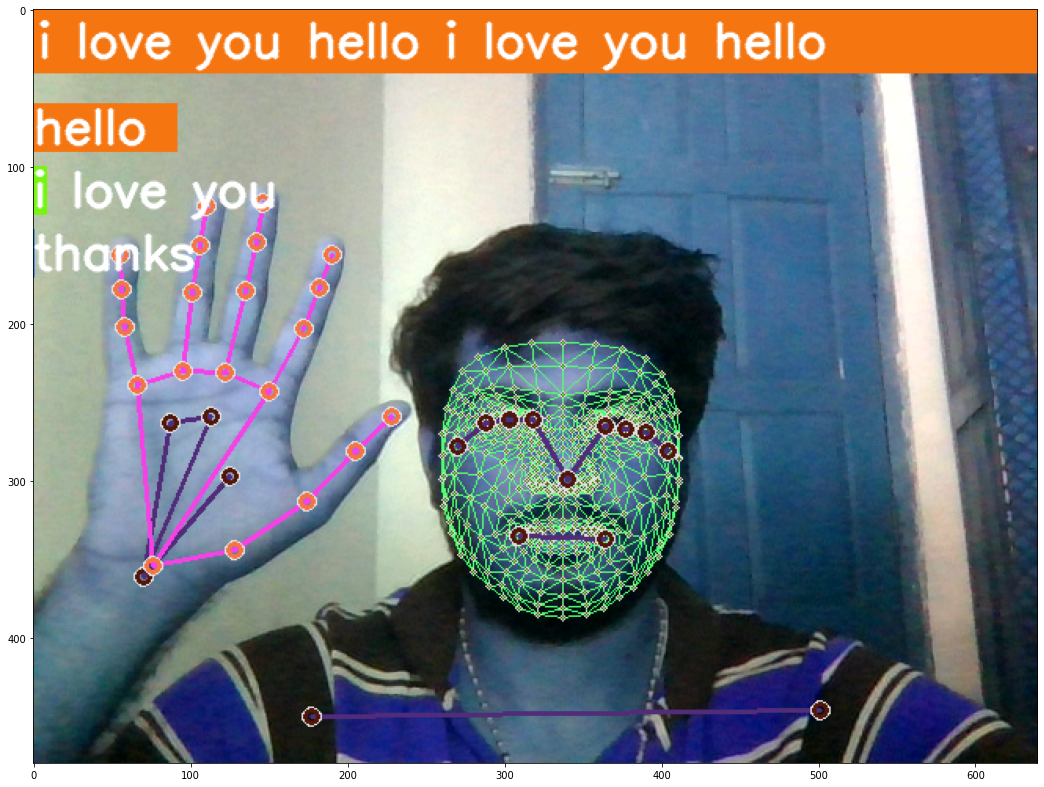

In [65]:
plt.figure(figsize=(18, 18))
plt.imshow(prob_viz(res, actions, image, colors))